In [1]:
import pandas as pd
import cv2
import pytesseract
import math
import psycopg2
import os
import matplotlib.pyplot as plt
conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
cur = conn.cursor()

In [2]:
df = pd.read_csv("../自己用爬蟲抓/register/stage2/register.csv")
df.head()

,申請案號,圖樣中文,圖樣英文,圖樣日文,圖樣記號
0,106044499,大統大牛排,NaN,NaN,NaN
1,107041203,熊讚,NaN,NaN,NaN
2,108021277,NaN,NaN,NaN,NaN
3,105017900,蒙奇奇,NaN,NaN,NaN
4,108077265,櫻桃小鎮,CHERRY TOWN,NaN,NaN


In [3]:
x = df["圖樣中文"].isna().map(lambda x: '' if x else 'chi_tra').tolist()
y = df["圖樣英文"].isna().map(lambda x: '' if x else 'eng').tolist()
z = df["圖樣日文"].isna().map(lambda x: '' if x else 'jpn').tolist()
method_list = []
for i, j, k in zip(x, y, z):
    method_list.append("+".join([i, j, k]).strip("+"))

In [4]:
df['method'] = pd.Series(method_list).map(lambda x: "chi_tra+jpn" if x == 'chi_tra++jpn' else x)
df['method'].value_counts()

eng                286541
chi_tra            183813
chi_tra+eng        129701
                    47581
chi_tra+jpn          3704
chi_tra+eng+jpn      2620
jpn                  1611
eng+jpn              1203
Name: method, dtype: int64

In [5]:
%%time
caseno_list = []
cur.execute("SELECT trademark.caseno, trademark.doc, rcc.Class, rcp.FileName \
            FROM trademark  INNER JOIN  rcc ON (trademark.caseno = rcc.caseno) \
             INNER JOIN rcp ON ( trademark.caseno = rcp.caseno  ) \
where (doc='TrademarkRegXMLB_048005' or doc='TrademarkRegXMLB_048004' or doc='TrademarkRegXMLB_048003' \
        or doc='TrademarkRegXMLB_048002' or doc='TrademarkRegXMLB_048001' \
        or doc='TrademarkRegXMLB_047024' or doc='TrademarkRegXMLB_047023' or doc='TrademarkRegXMLB_047022' \
        or doc='TrademarkRegXMLB_047021' or doc='TrademarkRegXMLB_047020' or doc='TrademarkRegXMLB_047019' \
        or doc='TrademarkRegXMLB_047018' or doc='TrademarkRegXMLB_047017' or doc='TrademarkRegXMLB_047016')\
        ")
r = cur.fetchall()

CPU times: user 80.3 ms, sys: 86.7 ms, total: 167 ms
Wall time: 4.49 s


In [6]:
caseno_list += [i for i in r]
len(caseno_list)

62355

In [7]:
df2 = pd.DataFrame(caseno_list).rename({0:'申請案號',1:'doc',2:'Class',3:'FileName'}, axis = 1)
df2['path'] = "/Users/laiqunlong/Downloads/XMLB/"+df2['doc']+"/"+df2["FileName"]
df2.drop(columns=['doc', 'FileName'], inplace = True)
df2.head()

,申請案號,Class,path
0,108034309,1.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...
1,108086643,3.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...
2,108086647,3.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...
3,108086648,3.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...
4,108086649,3.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...


In [8]:
df3 = df.merge(df2, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='both']
df3.drop(columns=["_merge"], inplace = True)
df3.head()

,申請案號,圖樣中文,圖樣英文,圖樣日文,圖樣記號,method,Class,path
12,109035351,喜芳,NaN,NaN,NaN,chi_tra,30.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...
19,109051597,慶記,NaN,NaN,NaN,chi_tra,35.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...
22,109015625,良德舒丹七,NaN,NaN,NaN,chi_tra,5.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...
24,108046653,家誠全球數位醫材,JIA CHEN,NaN,NaN,chi_tra+eng,44.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...
27,109019942,NaN,HI MAX,NaN,NaN,eng,5.0,/Users/laiqunlong/Downloads/XMLB/TrademarkRegX...


In [9]:
method_list = list(df3['method'].value_counts().index)
method_list

['eng',
 'chi_tra',
 'chi_tra+eng',
 '',
 'chi_tra+jpn',
 'chi_tra+eng+jpn',
 'jpn',
 'eng+jpn']

英文---Sample1


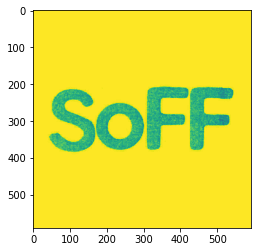

輸出: SoFF

英文---Sample2


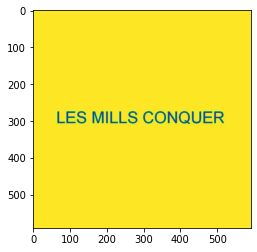

輸出: LESMILLSCONQUER

英文---Sample3


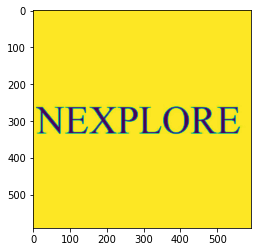

輸出: NEXPLORE

英文---Sample4


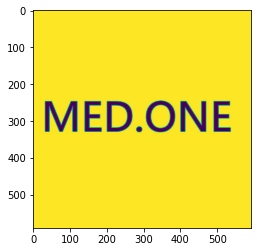

輸出: MED.ONE

英文---Sample5


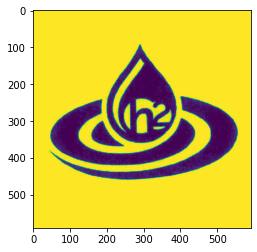

輸出: 

英文---Sample6


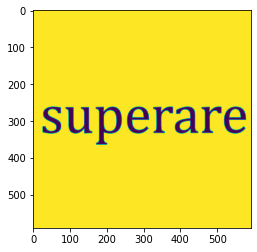

輸出: superare

英文---Sample7


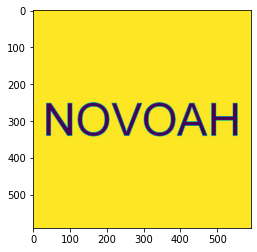

輸出: NOVOAH

英文---Sample8


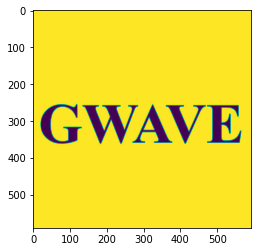

輸出: GWAVE

英文---Sample9


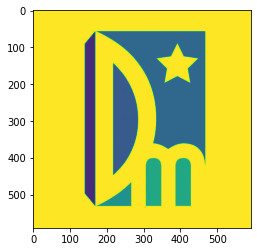

輸出: 

英文---Sample10


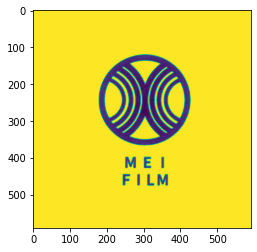

輸出: 

繁體中文---Sample1


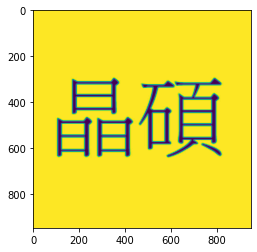

輸出: 

繁體中文---Sample2


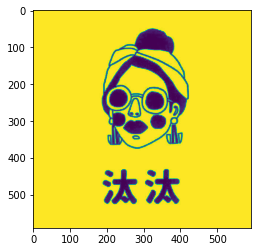

輸出: 汰汰

繁體中文---Sample3


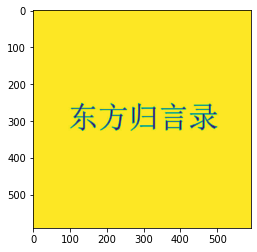

輸出: 祭方白言祈

繁體中文---Sample4


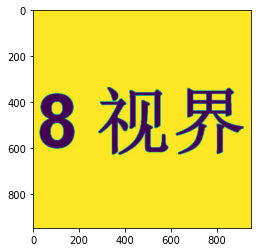

輸出: 

繁體中文---Sample5


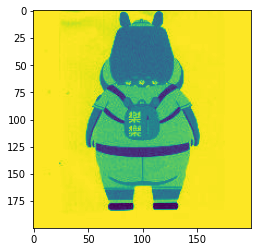

輸出: 

繁體中文---Sample6


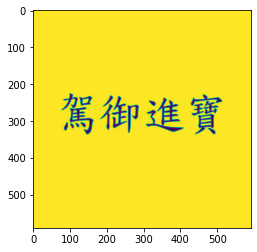

輸出: 

繁體中文---Sample7


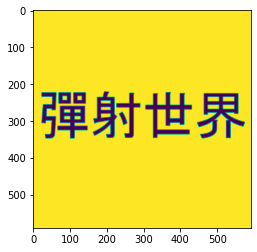

輸出: 哉射世界

繁體中文---Sample8


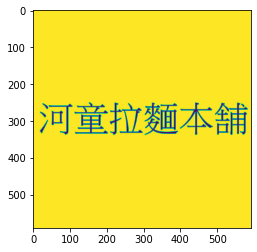

輸出: 河童拉麵本舖

繁體中文---Sample9


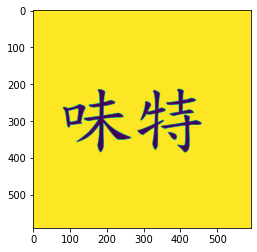

輸出: 味特

繁體中文---Sample10


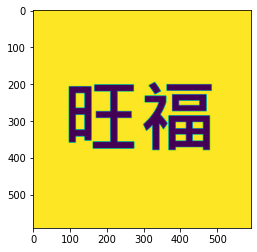

輸出: 昂倡

繁體中文+英文---Sample1


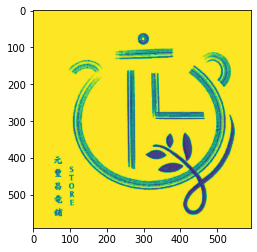

輸出: 

繁體中文+英文---Sample2


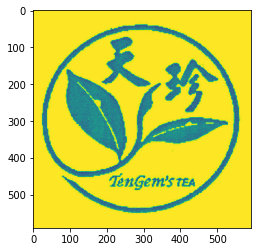

輸出: 

繁體中文+英文---Sample3


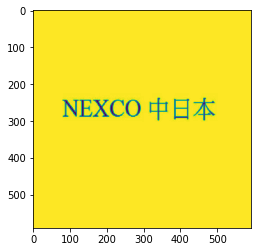

輸出: NEXCO中日本

繁體中文+英文---Sample4


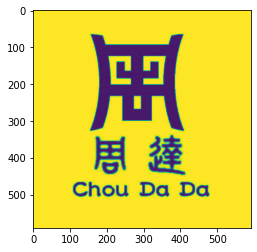

輸出: ChouDaDa

繁體中文+英文---Sample5


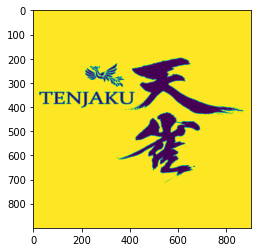

輸出: sud.rNee

繁體中文+英文---Sample6


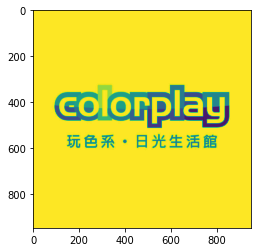

輸出: ‘colorplay玩色系‧日光生活箕

繁體中文+英文---Sample7


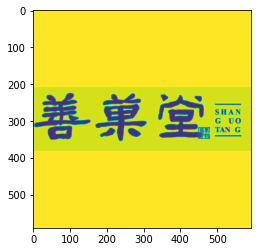

輸出: 懦heSHANGUOTANG

繁體中文+英文---Sample8


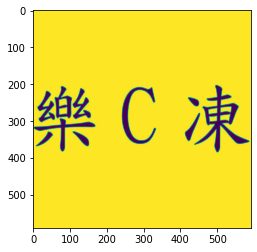

輸出: 樂C凍

繁體中文+英文---Sample9


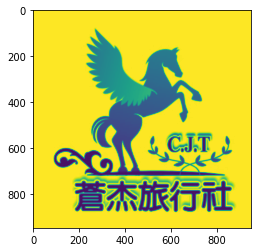

輸出: 蓮烏旅行社

繁體中文+英文---Sample10


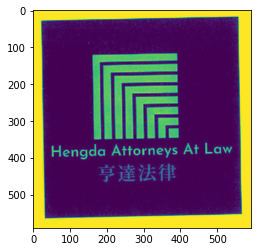

輸出: 則HengdaAttorneysAtLaw

繁體中文+日文---Sample1


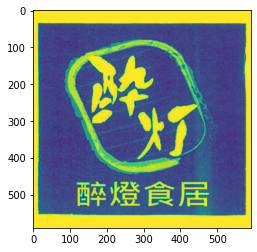

輸出: 

繁體中文+日文---Sample2


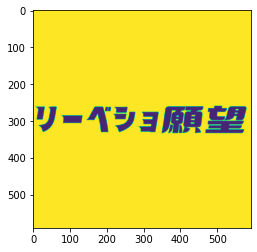

輸出: 引口仁3一時琪

繁體中文+日文---Sample3


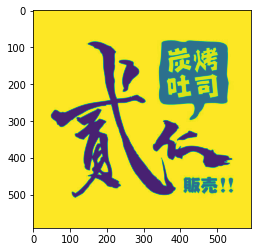

輸出: 

繁體中文+日文---Sample4


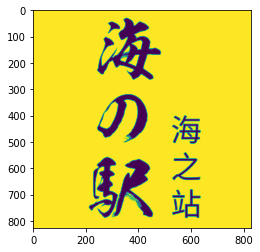

輸出: 煦志近

繁體中文+日文---Sample5


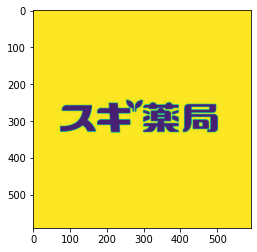

輸出: スギ薬局

繁體中文+日文---Sample6


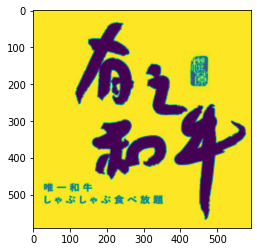

輸出: 國囤唯一和牛しゃぶしゃぶ餮《放題

繁體中文+日文---Sample7


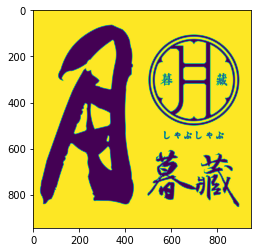

輸出: 

繁體中文+日文---Sample8


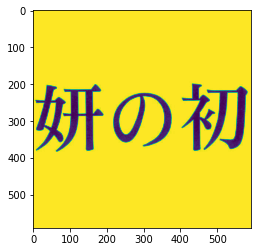

輸出: 妍0初

繁體中文+日文---Sample9


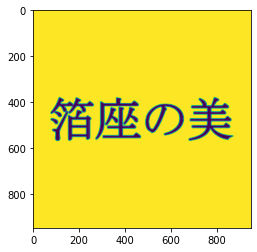

輸出: 淅座必美

繁體中文+日文---Sample10


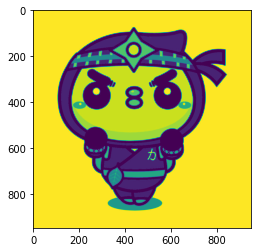

輸出: 

繁體中文+英文+日文---Sample1


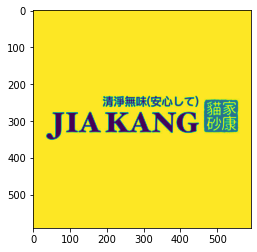

輸出: 清浮無味(安心して)JIARKANG陣

繁體中文+英文+日文---Sample2


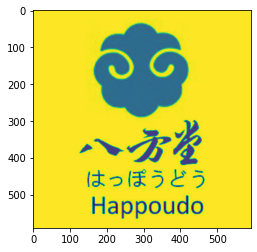

輸出: へ方をはっぼうどうHappoudo

繁體中文+英文+日文---Sample3


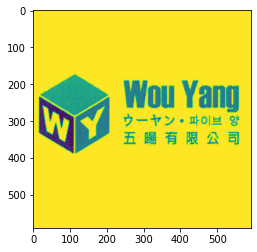

輸出: ウーヤン・可0|巴豈五晾有限公司<B>WouYang

繁體中文+英文+日文---Sample4


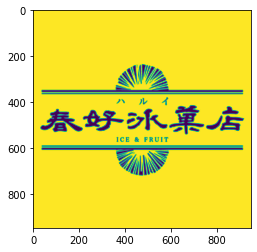

輸出: MWY2»儿了K鱨IBFhae﹣宛AIS

繁體中文+英文+日文---Sample5


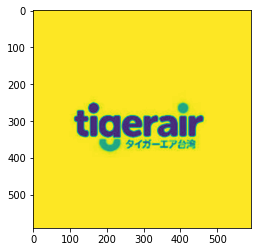

輸出: tiaerair轍藤夕7刀一工力名淪

繁體中文+英文+日文---Sample6


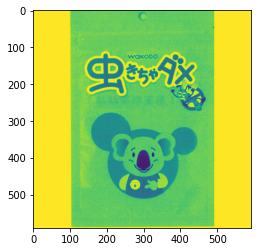

輸出: 

繁體中文+英文+日文---Sample7


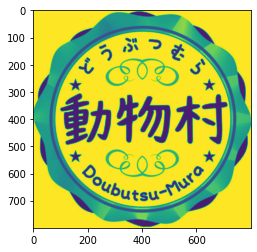

輸出: 

繁體中文+英文+日文---Sample8


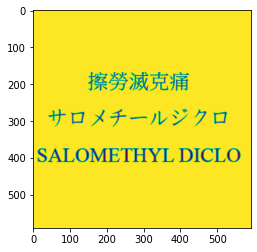

輸出: 擦勞滅克痛サロメチールジクロSALOMETHYLDICLO

繁體中文+英文+日文---Sample9


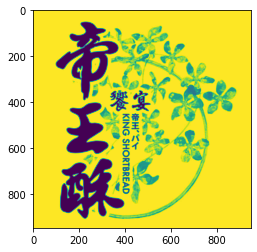

輸出: 內﹒7qg(3cp#eee<pXいa`﹒ˊˉ're/膠﹒w史戶韡黌帝王、<一|“5BesKINGSRORTBREAD4。aN9

繁體中文+英文+日文---Sample10


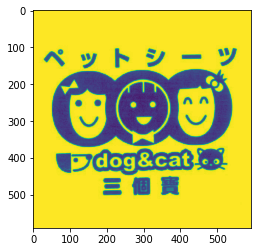

輸出: 唐刓早愛。《﹍夕窄(豈唐一CCCEXoC0塾=6B

日文---Sample1


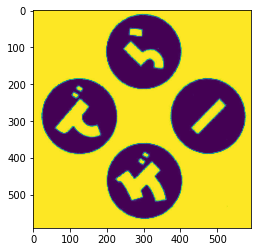

輸出: 

日文---Sample2


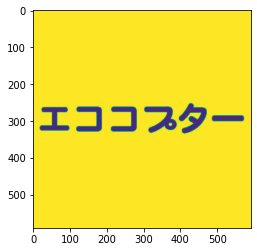

輸出: エココスター

日文---Sample3


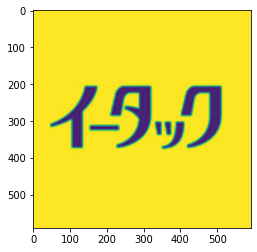

輸出: イブ

日文---Sample4


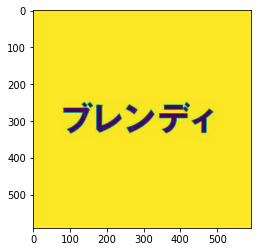

輸出: ブレンディ

日文---Sample5


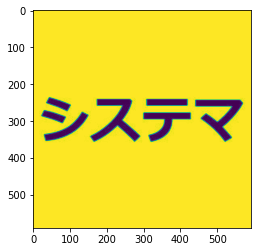

輸出: システマ

日文---Sample6


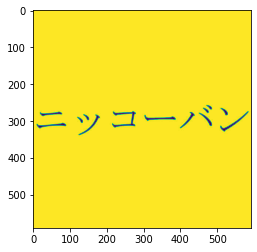

輸出: ニッコーバン

日文---Sample7


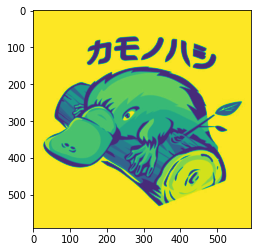

輸出: 

日文---Sample8


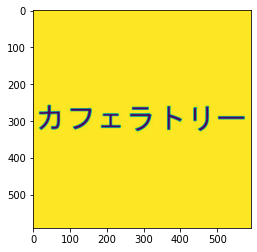

輸出: カフェラトリー

日文---Sample9


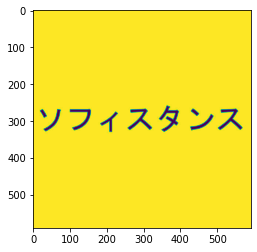

輸出: ソフィスタンス

日文---Sample10


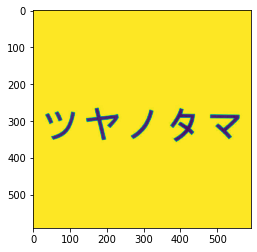

輸出: ツヤノタマ

英文+日文---Sample1


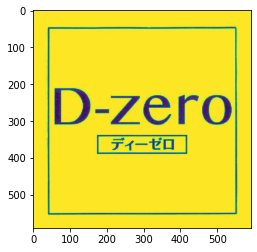

輸出: D-7ero|ディーゼロ|

英文+日文---Sample2


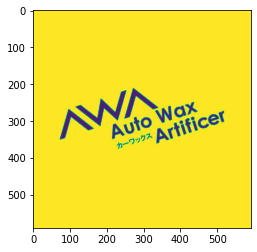

輸出: Wsx?prtitice’うー

英文+日文---Sample3


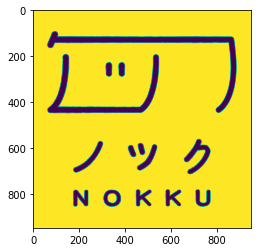

輸出: 

英文+日文---Sample4


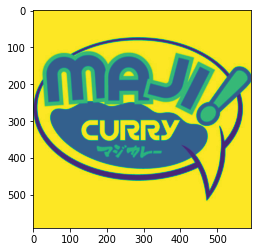

輸出: 

英文+日文---Sample5


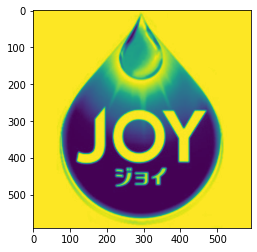

輸出: 

英文+日文---Sample6


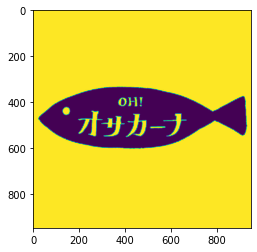

輸出: 

英文+日文---Sample7


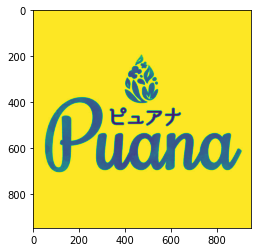

輸出: 4,るのNwピュアナWOU

英文+日文---Sample8


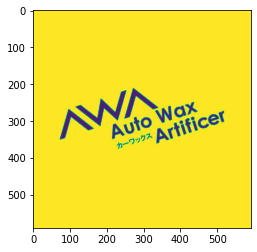

輸出: Wsx?prtitice’うー

英文+日文---Sample9


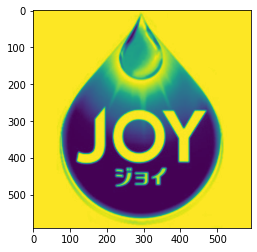

輸出: 

英文+日文---Sample10


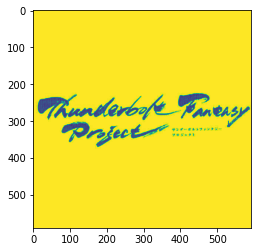

輸出: TReunterofeTaneny"Orジーmoot



In [11]:
tessdata_dir_config = '--tessdata-dir "/usr/local/Cellar/tesseract/4.1.1/share/tessdata"'
for method in method_list:
    if(method == ""):
        continue
    temp = df3[df3["method"] == method].sample(n=10).reset_index()
    for i, row in temp.iterrows():
        print("{}---Sample{}".format(method.replace("eng", "英文").replace("chi_tra", "繁體中文").replace("jpn", "日文"), i+1))
        image = cv2.imread(row['path'])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        imgplot = plt.imshow(image)
        plt.show()
        text = pytesseract.image_to_string(image, lang= row['method'])
        print("輸出: {}".format(text.replace(" ", "").replace("\n", "")))
        print()